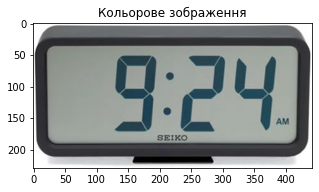

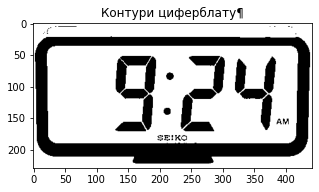

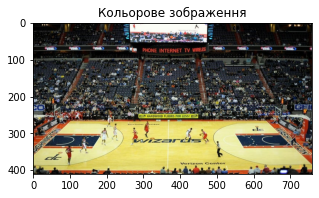

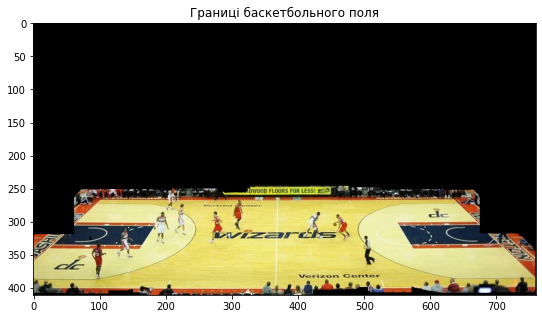

In [63]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

#Циферблат
img_digit = cv2.imread("C:\\Users\\User\\Desktop\\Slavik\\lab6\\digit.jpg")
img_digit_gray = cv2.cvtColor(img_digit, cv2.COLOR_BGR2GRAY)
img_digit_rgb = cv2.cvtColor(img_digit, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(5, 5))
plt.title("Кольорове зображення")
plt.imshow(img_digit_rgb)
plt.show()


kernel = np.ones((1, 1),"uint8")

_,thr_func = cv2.threshold(img_digit_gray,100,255,cv2.THRESH_BINARY)

border_cont = cv2.morphologyEx(thr_func, cv2.MORPH_CLOSE, kernel)
border_cont = cv2.erode(border_cont,kernel,iterations = 1)

plt.figure(figsize=(5, 5))
plt.title("Контури циферблату¶")
plt.imshow(border_cont, cmap="gray")
plt.show()


#Баскетбольне поле
img_bb = cv2.imread("C:\\Users\\User\\Desktop\\Slavik\\lab6\\basketball.jpg")
img_bb_gray = cv2.cvtColor(img_bb, cv2.COLOR_BGR2GRAY)
img_bb_rgb = cv2.cvtColor(img_bb, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(5, 5))
plt.title("Кольорове зображення")
plt.imshow(img_bb_rgb)
plt.show()
kernel = np.ones((5, 5),"uint8")
_,thresh_up = cv2.threshold(img_bb_gray,245,255,cv2.THRESH_BINARY)
_,thresh_down = cv2.threshold(img_bb_gray,190,255,cv2.THRESH_BINARY)

mask = thresh_down-thresh_up

erode = cv2.erode(mask,kernel,iterations=4)
dilate = cv2.dilate(erode,kernel,iterations=15)

court = cv2.bitwise_and(img_bb_rgb, img_bb_rgb, mask = dilate)

plt.figure(figsize=(10,5))
plt.title("Границі баскетбольного поля")
plt.imshow(court)